In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pickle

data=pd.read_csv('Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [53]:
#Preprocess data 
# drop irrelevent features
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
print(data.head())



   CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female  ...               1        101348.88       1
1          608     Spain  Female  ...               1        112542.58       0
2          502    France  Female  ...               0        113931.57       1
3          699    France  Female  ...               0         93826.63       0
4          850     Spain  Female  ...               1         79084.10       0

[5 rows x 11 columns]


In [54]:
#Encode categorical features
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
print(data.head(10))


   CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France       0  ...               1        101348.88       1
1          608     Spain       0  ...               1        112542.58       0
2          502    France       0  ...               0        113931.57       1
3          699    France       0  ...               0         93826.63       0
4          850     Spain       0  ...               1         79084.10       0
5          645     Spain       1  ...               0        149756.71       1
6          822    France       1  ...               1         10062.80       0
7          376   Germany       0  ...               0        119346.88       1
8          501    France       1  ...               1         74940.50       0
9          684    France       1  ...               1         71725.73       0

[10 rows x 11 columns]


In [55]:
#One hot encode the 'Geography' column, cause it has more than two categories
onehot_encoder_geo=OneHotEncoder(sparse_output=False)  
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']])
print(data.head())
print(onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoder_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
print(geo_encoder_df.head())

   CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France       0  ...               1        101348.88       1
1          608     Spain       0  ...               1        112542.58       0
2          502    France       0  ...               0        113931.57       1
3          699    France       0  ...               0         93826.63       0
4          850     Spain       0  ...               1         79084.10       0

[5 rows x 11 columns]
['Geography_France' 'Geography_Germany' 'Geography_Spain']
   Geography_France  Geography_Germany  Geography_Spain
0               1.0                0.0              0.0
1               0.0                0.0              1.0
2               1.0                0.0              0.0
3               1.0                0.0              0.0
4               0.0                0.0              1.0


In [56]:
#combine one hot encoded columns with original dataframe and drop 'Geography' column
data=pd.concat([data,geo_encoder_df],axis=1)
data=data.drop(['Geography'],axis=1)
print(data.head(10))


   CreditScore  Gender  ...  Geography_Germany  Geography_Spain
0          619       0  ...                0.0              0.0
1          608       0  ...                0.0              1.0
2          502       0  ...                0.0              0.0
3          699       0  ...                0.0              0.0
4          850       0  ...                0.0              1.0
5          645       1  ...                0.0              1.0
6          822       1  ...                0.0              0.0
7          376       0  ...                1.0              0.0
8          501       1  ...                0.0              0.0
9          684       1  ...                0.0              0.0

[10 rows x 13 columns]


In [57]:
#save the encoders and scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)
with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


In [58]:
#independent and dependent features
X=data.drop(['Exited'],axis=1)
y=data['Exited']
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#feature scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#save the scaler
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
print(X_train[:5])
print(y_train[:5])


[[ 0.35649971  0.91324755 -0.6557859   0.34567966 -1.21847056  0.80843615
   0.64920267  0.97481699  1.36766974  1.00150113 -0.57946723 -0.57638802]
 [-0.20389777  0.91324755  0.29493847 -0.3483691   0.69683765  0.80843615
   0.64920267  0.97481699  1.6612541  -0.99850112  1.72572313 -0.57638802]
 [-0.96147213  0.91324755 -1.41636539 -0.69539349  0.61862909 -0.91668767
   0.64920267 -1.02583358 -0.25280688 -0.99850112 -0.57946723  1.73494238]
 [-0.94071667 -1.09499335 -1.13114808  1.38675281  0.95321202 -0.91668767
   0.64920267 -1.02583358  0.91539272  1.00150113 -0.57946723 -0.57638802]
 [-1.39733684  0.91324755  1.62595257  1.38675281  1.05744869 -0.91668767
  -1.54035103 -1.02583358 -1.05960019  1.00150113 -0.57946723 -0.57638802]]
9254    0
1561    0
1670    1
6087    1
6669    1
Name: Exited, dtype: int64


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                832       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
200/200 [==============================] - 0s 859us/step - loss: 0.4615 - accuracy: 0.8011 - val_loss: 0.4091 - val_accuracy: 0.8275
Epoch 2/100
200/200 [==============================] - 0s 557us/step - loss: 0.3991 - accuracy: 0.8322 - val_loss: 0.3795 - val_accuracy: 0

/Users/khushalidesai/Desktop/ANN Classification/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


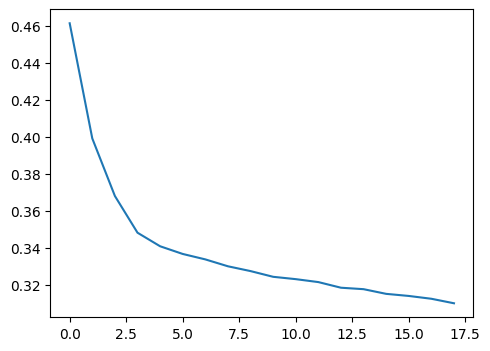

In [72]:
#ANN implementation
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

#build the model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),#(12,)meaning single dimention
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')  #binary classification
])
model.summary()#params are weights and biases

#compile the model 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#optmizer different way

#opt=tf.keras.optimizers.Adam(learning_rate=0.001)#this way you can change learning rate
#loss=tf.keras.losses.BinaryCrossentropy()#different way to define loss function
#model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])
#print(loss)
#callbacks
#early stopping to prevent overfitting, where loss is decreasing but then it stops so no need to 
#keep going
#patience is how many epochs to wait before stopping
#restore_best_weights=True to restore the best weights after stopping

#set up tensorboard
log_dir="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)#visualize log 
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
#train the model
history=model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=32,callbacks=[early_stopping_callback,tensorboard_callback])
#evaluate the model
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
#save the model
model.save('churn_model.h5')#compatible with keras to load the model
#loaded_model=keras.models.load_model('churn_model.h5')     

#plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')






In [73]:
#load tensorboard extension
#%load_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir logs/fit #take tensorboard use log dir inside I have log/fit folder.


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 78868), started 0:05:50 ago. (Use '!kill 78868' to kill it.)

In [ ]:
#load pickle files
